<a href="https://colab.research.google.com/github/VISHWA-Portfolio/IBM-SALES-PREDICTION/blob/main/IBM_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 IBM Sales Opportunity Prediction with 89% Accuracy using **Random Forest**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/WA_Fn-UseC_-Sales-Win-Loss.csv.zip")
df


,Opportunity Number,Supplies Subgroup,Supplies Group,Region,Route To Market,Elapsed Days In Sales Stage,Opportunity Result,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Competitor Type,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
0,1641984,Exterior Accessories,Car Accessories,Northwest,Fields Sales,76,Won,13,104,101,0,5,5,0,Unknown,0.69636,0.113985,0.154215,1
1,1658010,Exterior Accessories,Car Accessories,Pacific,Reseller,63,Loss,2,163,163,0,3,5,0,Unknown,0.00000,1.000000,0.000000,1
2,1674737,Motorcycle Parts,Performance & Non-auto,Pacific,Reseller,24,Won,7,82,82,7750,1,1,0,Unknown,1.00000,0.000000,0.000000,1
3,1675224,Shelters & RV,Performance & Non-auto,Midwest,Reseller,16,Loss,5,124,124,0,1,1,0,Known,1.00000,0.000000,0.000000,1
4,1689785,Exterior Accessories,Car Accessories,Pacific,Reseller,69,Loss,11,91,13,69756,1,1,0,Unknown,0.00000,0.141125,0.000000,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78020,10089932,Batteries & Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,250000,1,1,3,Unknown,0.00000,0.000000,0.000000,6
78021,10089961,Shelters & RV,Performance & Non-auto,Northeast,Reseller,0,Won,1,0,0,180000,1,1,0,Unknown,0.00000,0.000000,0.000000,5
78022,10090145,Exterior Accessories,Car Accessories,Southeast,Reseller,0,Loss,2,0,0,90000,1,1,0,Unknown,0.00000,0.000000,0.000000,4
78023,10090430,Exterior Accessories,Car Accessories,Southeast,Fields Sales,0,Loss,2,0,0,120000,1,1,0,Unknown,1.00000,0.000000,0.000000,5


In [ ]:
df.columns

Index(['Opportunity Number', 'Supplies Subgroup', 'Supplies Group', 'Region',
       'Route To Market', 'Elapsed Days In Sales Stage', 'Opportunity Result',
       'Sales Stage Change Count', 'Total Days Identified Through Closing',
       'Total Days Identified Through Qualified', 'Opportunity Amount USD',
       'Client Size By Revenue', 'Client Size By Employee Count',
       'Revenue From Client Past Two Years', 'Competitor Type',
       'Ratio Days Identified To Total Days',
       'Ratio Days Validated To Total Days',
       'Ratio Days Qualified To Total Days', 'Deal Size Category'],
      dtype='object')

In [ ]:
df.shape

(78025, 19)

In [ ]:
df.describe()

,Opportunity Number,Elapsed Days In Sales Stage,Sales Stage Change Count,Total Days Identified Through Closing,Total Days Identified Through Qualified,Opportunity Amount USD,Client Size By Revenue,Client Size By Employee Count,Revenue From Client Past Two Years,Ratio Days Identified To Total Days,Ratio Days Validated To Total Days,Ratio Days Qualified To Total Days,Deal Size Category
count,7.802500e+04,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000,78025.000000
mean,7.653429e+06,43.595348,2.955732,16.728356,16.314348,91637.260750,1.620481,1.604050,0.303287,0.203063,0.488314,0.185048,3.436745
std,1.054848e+06,26.585600,1.497242,16.729593,16.562597,133161.029157,1.235796,1.210744,0.930290,0.364985,0.448077,0.340283,1.656890
min,1.641984e+06,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,6.900423e+06,19.000000,2.000000,4.000000,4.000000,15000.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,7.545569e+06,43.000000,3.000000,12.000000,12.000000,49000.000000,1.000000,1.000000,0.000000,0.000000,0.448000,0.000000,3.000000
75%,8.228329e+06,65.000000,3.000000,24.000000,24.000000,105099.000000,1.000000,1.000000,0.000000,0.197225,1.000000,0.188552,5.000000
max,1.009427e+07,210.000000,23.000000,208.000000,208.000000,1000000.000000,5.000000,5.000000,4.000000,1.000000,1.000000,1.000000,7.000000


In [ ]:
df.isnull().sum()

,0
Opportunity Number,0
Supplies Subgroup,0
Supplies Group,0
Region,0
Route To Market,0
Elapsed Days In Sales Stage,0
Opportunity Result,0
Sales Stage Change Count,0
Total Days Identified Through Closing,0
Total Days Identified Through Qualified,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Opportunity Number                       78025 non-null  int64  
 1   Supplies Subgroup                        78025 non-null  object 
 2   Supplies Group                           78025 non-null  object 
 3   Region                                   78025 non-null  object 
 4   Route To Market                          78025 non-null  object 
 5   Elapsed Days In Sales Stage              78025 non-null  int64  
 6   Opportunity Result                       78025 non-null  object 
 7   Sales Stage Change Count                 78025 non-null  int64  
 8   Total Days Identified Through Closing    78025 non-null  int64  
 9   Total Days Identified Through Qualified  78025 non-null  int64  
 10  Opportunity Amount USD                   78025

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Supplies Subgroup']=le.fit_transform(df['Supplies Subgroup'])
df['Supplies Group']=le.fit_transform(df['Supplies Group'])
df['Region']=le.fit_transform(df['Region'])
df['Route To Market']=le.fit_transform(df['Route To Market'])
df['Opportunity Result']=le.fit_transform(df['Opportunity Result'])
df['Competitor Type']=le.fit_transform(df['Competitor Type'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78025 entries, 0 to 78024
Data columns (total 19 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Opportunity Number                       78025 non-null  int64  
 1   Supplies Subgroup                        78025 non-null  int64  
 2   Supplies Group                           78025 non-null  int64  
 3   Region                                   78025 non-null  int64  
 4   Route To Market                          78025 non-null  int64  
 5   Elapsed Days In Sales Stage              78025 non-null  int64  
 6   Opportunity Result                       78025 non-null  int64  
 7   Sales Stage Change Count                 78025 non-null  int64  
 8   Total Days Identified Through Closing    78025 non-null  int64  
 9   Total Days Identified Through Qualified  78025 non-null  int64  
 10  Opportunity Amount USD                   78025

In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Opportunity Number,0
Supplies Subgroup,0
Supplies Group,0
Region,0
Route To Market,0
Elapsed Days In Sales Stage,0
Opportunity Result,0
Sales Stage Change Count,0
Total Days Identified Through Closing,0
Total Days Identified Through Qualified,0


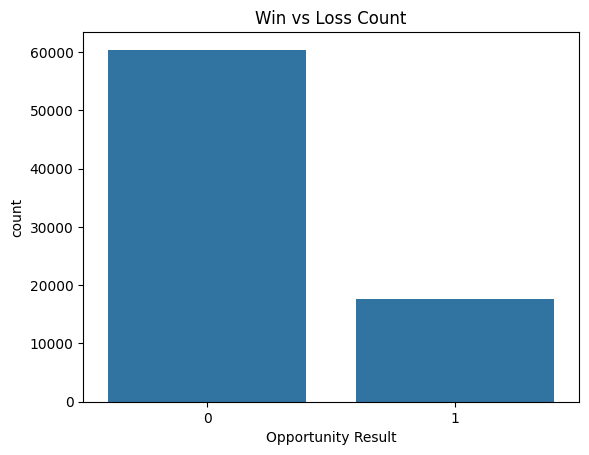

In [ ]:
# 1. Count Plot
sns.countplot(x='Opportunity Result', data=df)
plt.title("Win vs Loss Count")
plt.show()

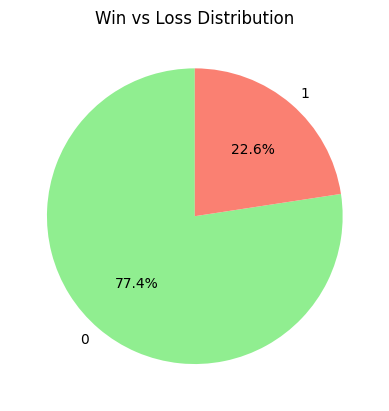

In [ ]:
# 2. Pie Chart
df['Opportunity Result'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['lightgreen', 'salmon'])
plt.title("Win vs Loss Distribution")
plt.ylabel("")
plt.show()

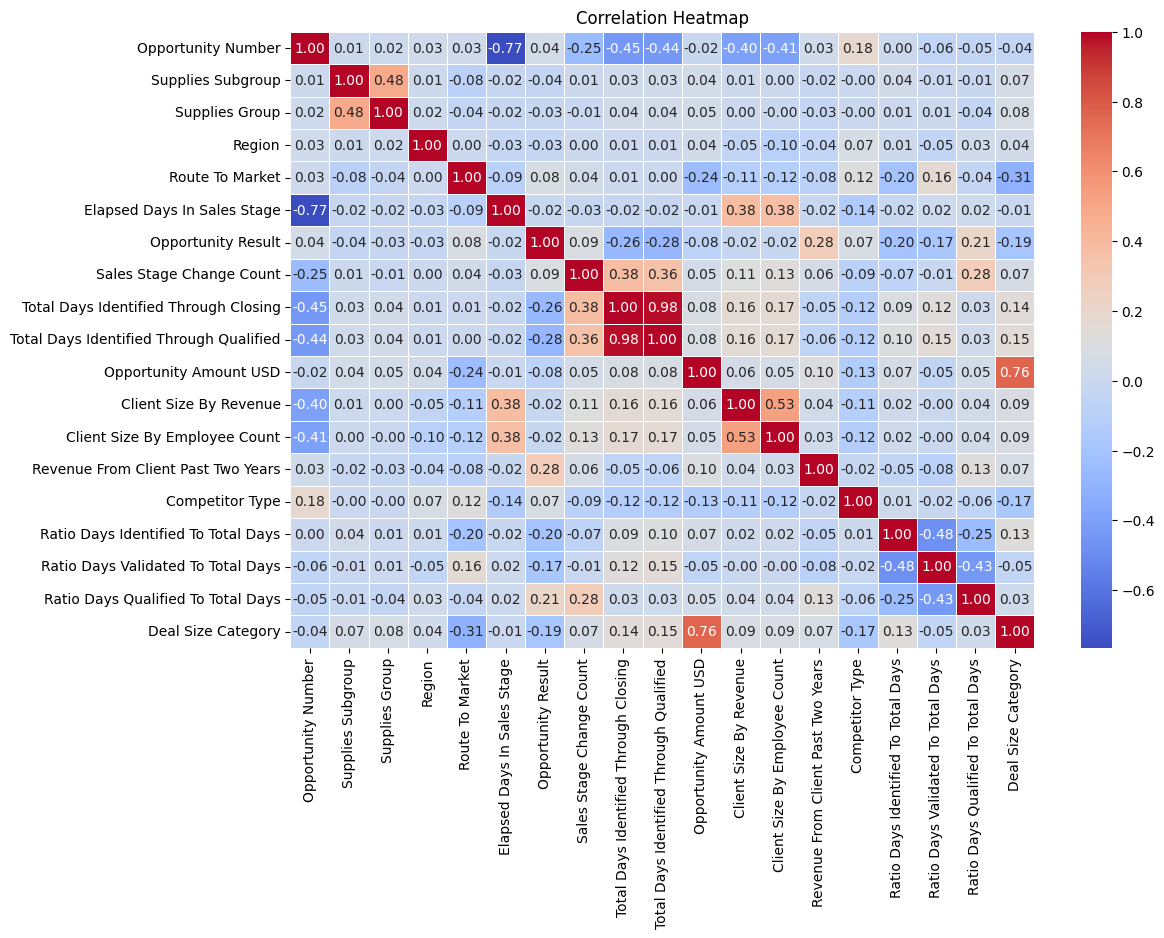

In [ ]:
# 3. Correlation heatmap
import numpy as np

# Convert categorical to numeric only for correlation
df_corr = df.copy()
for col in df_corr.select_dtypes(include=['object']).columns:
    df_corr[col] = pd.factorize(df_corr[col])[0]

# Compute correlation
correlation_matrix = df_corr.corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

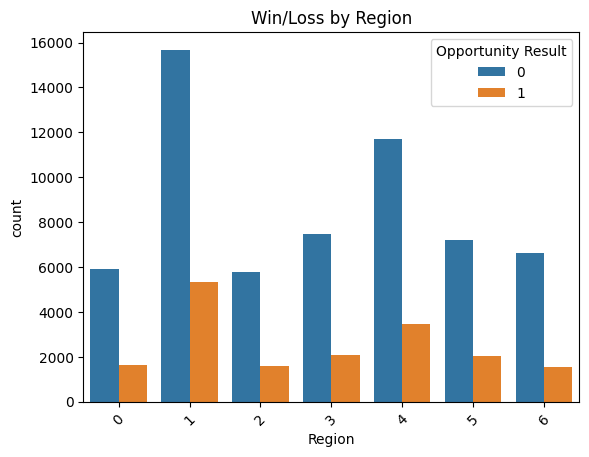

In [ ]:
# 4. Grouped Bar Plot: Region vs Outcome
sns.countplot(x='Region', hue='Opportunity Result', data=df)
plt.title("Win/Loss by Region")
plt.xticks(rotation=45)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode categorical features
df_encoded = df.copy()
# Categorical columns were already encoded in cell zjKrLxbdLMSp, so this loop is not needed
# for col in df_encoded.select_dtypes(include='object').columns:
#     df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# Drop irrelevant or identifier columns if needed (optional)
# df_encoded = df_encoded.drop(columns=["Opportunity Number"])

# Features (X) and Target (y)
X = df_encoded.drop(columns=['Opportunity Result'])  # All features except the target
y = df_encoded['Opportunity Result']  # 'Opportunity Result' is the target variable

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Data split into training and testing sets.")
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Data split into training and testing sets.
Shape of X_train: (62420, 18)
Shape of X_test: (15605, 18)
Shape of y_train: (62420,)
Shape of y_test: (15605,)


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

Accuracy: 0.8900352451137455

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.95      0.93     12123
           1       0.80      0.67      0.73      3482

    accuracy                           0.89     15605
   macro avg       0.86      0.81      0.83     15605
weighted avg       0.89      0.89      0.89     15605



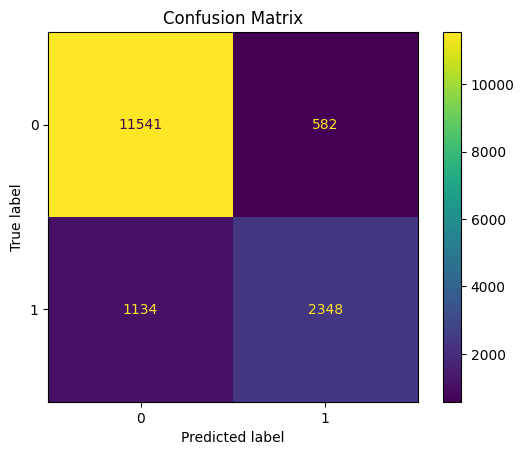

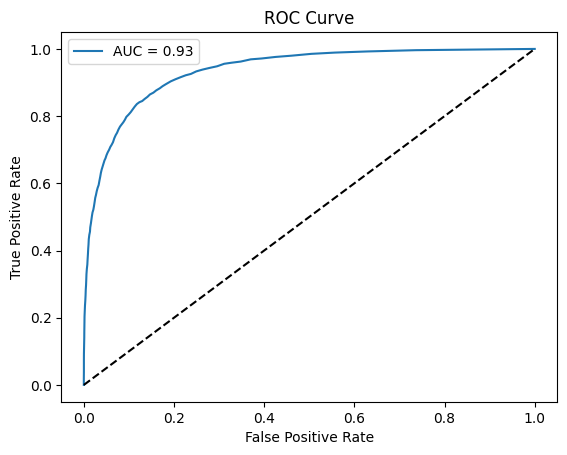

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score, roc_curve

# Accuracy and report
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.title("Confusion Matrix")
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.title("ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


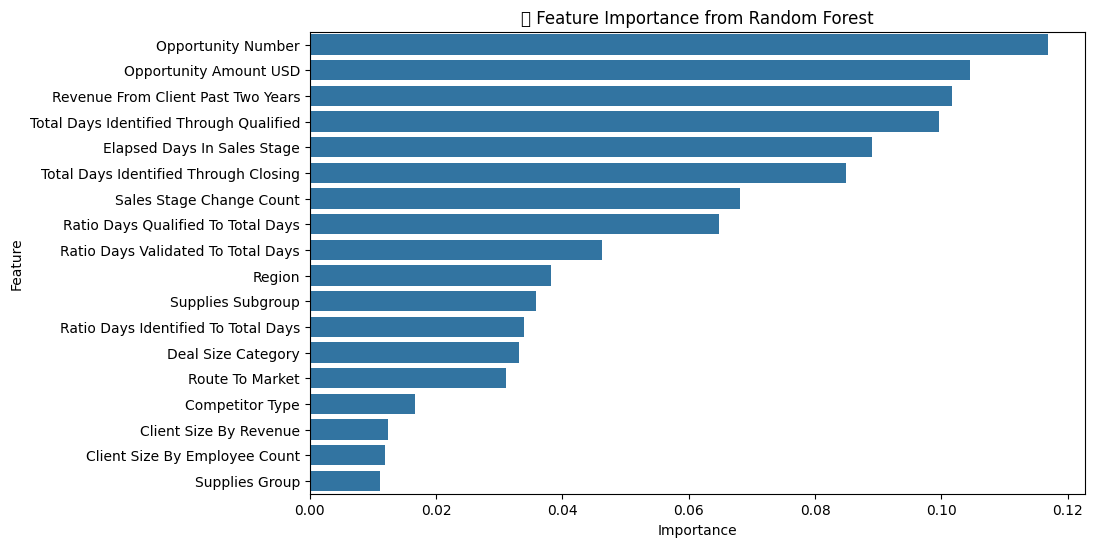

In [ ]:
import seaborn as sns

# Feature importances
importances = model.feature_importances_
feature_names = X.columns
fi_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
fi_df = fi_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=fi_df)
plt.title("🔍 Feature Importance from Random Forest")
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score

# Predict on test set
y_pred = model.predict(X_test)

# Calculate accuracy (0.0 to 1.0)
accuracy = accuracy_score(y_test, y_pred)

# Convert to percentage and print
print(f"✅ Final Model Accuracy: {accuracy * 100:.2f}%")

✅ Final Model Accuracy: 89.00%
